<a href="https://colab.research.google.com/github/janetomsamondi/Sentiment-Analysis-on-Twitter-Data/blob/main/SENTIMENT_ANALYSIS_USING_DATA_FROM_TWITTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Collect and Clean twitter data.
Topic: Impact of political campaign, in kenya, to the country's economy.
Big Q: What is the sentiments around the political campaign and the economy currenlt in kenya.
With the current increase in food prices, most citizens are complainiing an throwing blames to the current government. I am interested to know the sentiments around this topic.


In [1]:
!pip install tweepy #python client for official API
!pip install textblob #python library for processing textual datd
!python -m textblob.download_corpora #copora is large but structured text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


### Importing required and essential libraries.

In [2]:
import tweepy as tw
from tweepy import OAuthHandler
from textblob import TextBlob

In [3]:
import re    # for regular expressions 
import nltk  # for text manipulation  
import string #for string manipulations
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  
plt.style.use('fivethirtyeight')
pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [4]:
from wordcloud import WordCloud
import nltk 
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Getting and authenticating. my twitter keys 

In [5]:

# your Twitter API key and API secret
my_api_key = "e8i7kaUtmZtGvMOPH0k9xKq7a"
my_api_secret = "8abPokd8k1MGjMgkLXLswm4Zu5g0PfFl3w7QqBXeVEgeP7up31"
# authenticate
auth = tw.OAuthHandler(my_api_key, my_api_secret)
api = tw.API(auth, wait_on_rate_limit=True)
    

we are now able to build a search query

In [30]:
# Enter your search words in accordance with the basic filtering rules
search_words = "campaign OR foodprice OR economy OR covid19 OR lowerfoodprice"

# We also want to exclude retweets and replies as this may sway results
my_search = search_words + " -filter:retweets" + " -filter:replies"  

filter tweets based on our chosen language, which is english

In [31]:

# The Twitter data is stored in a Tweet object which we've called tweets
tweets = api.search(q=my_search,lang="en",tweet_mode="extended",count=100)

In [32]:
# Iterate and print tweets
i = 1
for tweet in tweets[0:20]:
    print(str(i) + ') ' + tweet.full_text + '\n')
    i = i + 1 

1) One of the biggest fallacy being told since Nigeria's 1999 democracy is the notion that election spendings help grow Nigeria's economy.

Na fat lie. 

The monetary interactions are usually done in the shadows amongst 0.0001% of Nigeria's population.

2) Great time at the 9th International Oil and Gas Conference in Lviv, #Ukraine. We are not stopping drilling and producing oil and gas wells during the war, the economy and general population desperately needs #energy resources! https://t.co/O2V6vRWJpY

3) https://t.co/59f5MksdWM

The year-on-year Foreign Direct Investment data draws a sharp contrast between India's highest ever FDI of USD 83.57 billion for the current year with Pakistan's 2022 flat foreign investment inflows.

4) In Mekele “One person per family” is the harsh request by TPLF when it forces people to join its failed war campaign! What else is a war crime?!#UnityForEthiopia TPLF must be disarmed!

5) Interesting... Interesting that I somehow don't use a single one of th

In [33]:
print(tweets[0])

Status(_api=<tweepy.api.API object at 0x7f3f14cea150>, _json={'created_at': 'Fri May 27 09:31:12 +0000 2022', 'id': 1530119418105278464, 'id_str': '1530119418105278464', 'full_text': "One of the biggest fallacy being told since Nigeria's 1999 democracy is the notion that election spendings help grow Nigeria's economy.\n\nNa fat lie. \n\nThe monetary interactions are usually done in the shadows amongst 0.0001% of Nigeria's population.", 'truncated': False, 'display_text_range': [0, 249], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 365539223, 'id_str': '365539223', 'name': 'Akọwekọwura', 'screen_name': 'Demurleigh', 'loc

In [34]:
#Now let us submit a query for 1000 tweets and save some of the metadata related to each tweet
tweets = tw.Cursor(api.search,q=my_search,lang="en",tweet_mode='extended').items(1000)

In [35]:
# Extract the info we need from the tweets object
tweet_info = [[tweet.id_str,tweet.created_at,tweet.user.location,tweet.full_text] for tweet in tweets]

In [36]:
# Put our data into a dataframe 
df = pd.DataFrame(data=tweet_info, columns=['tweet_id_str','date_time','location','tweet_text'])

# Have a quick look at the dataframe
df

,tweet_id_str,date_time,location,tweet_text
0,1530119489290919936,2022-05-27 09:31:29,Limsa Lominsa Lower Decks,The FFXIV Make It Rain 2022 Campaign Coming Soon With New Emotes https://t.co/s8ZnZLfjjq https://t.co/TXgTS1jxHg
1,1530119483951562752,2022-05-27 09:31:27,"Accra, Ghana","“The second phase of Ghana CARES programme aims at revitalising and transforming the economy between 2021 and 2023, and is focused on creating jobs for young people, and expanding opportunities fo..."
2,1530119483855093760,2022-05-27 09:31:27,,"Despite the blackout, there’s overwhelming evidence of:\n🔸manufactured famine\n🔸aid blockade\n🔸countless massacres\n🔸weaponized rape\n🔸mass arrests\n🔸concentration camps\nThis is a coordinated cam..."
3,1530119463038771200,2022-05-27 09:31:22,Furry Hell,"A new Extra Dungeon has been added to the ""Chapter 13 Campaign""! The ""Garden Dungeon"" will open from May 31st, 18:00 JST until June 17th, 13:59 JST! This Extra Dungeon drops HP and ATK Blossoms! h..."
4,1530119462170550277,2022-05-27 09:31:22,Seattle,ICYMI: Something big is brewing in the creator economy. $XCAD plugin is coming Q2. Follow @XcademyOfficial to find out more and #Watch2Earn 🚀🔥
...,...,...,...,...
995,1530111301250191360,2022-05-27 08:58:56,,#TelanganaWithModi\nIndia is the fastest growing economy among G20 nations\nhttps://t.co/PjpXiNxU2I\nvia NaMo App
996,1530111299828391936,2022-05-27 08:58:56,Hobart,"""Liberal polling taken a week before the campaign started found that the party was losing in [Reid, Bennelong, Parramatta] The polling would be leaked to the Ten Network six weeks later, according..."
997,1530111292631138304,2022-05-27 08:58:54,,"Donna Ockenden, the senior midwife who investigated the Shrewsbury and Telford maternity scandal, has been appointed to lead a review into failings in Nottingham following a campaign by families.\..."
998,1530111283558752257,2022-05-27 08:58:52,Herefordshire,Twas always going to come down to a matter of trust. The outrageous lies of the Brexit campaign had already evoked mistrust. This was exacerbated by the time he became PM with 43.6% of the vote. I...


In [37]:
for i,tweet in enumerate(df['tweet_text'].head(20)):
    print(i+1, tweet, '\n')

1 The FFXIV Make It Rain 2022 Campaign Coming Soon With New Emotes https://t.co/s8ZnZLfjjq https://t.co/TXgTS1jxHg 

2 “The second phase of Ghana CARES programme aims at revitalising and transforming the economy between 2021 and 2023, and is focused on creating jobs for young people, and expanding opportunities for the vulnerable in society.”—President Akufo-Addo
#GovernmentSoFar https://t.co/OuOrAqYlJ5 

3 Despite the blackout, there’s overwhelming evidence of:
🔸manufactured famine
🔸aid blockade
🔸countless massacres
🔸weaponized rape
🔸mass arrests
🔸concentration camps
This is a coordinated campaign to eliminate an entire ethnicity. #TigrayGenocide @POTUS @SecBlinken @USUN 

4 A new Extra Dungeon has been added to the "Chapter 13 Campaign"! The "Garden Dungeon" will open from May 31st, 18:00 JST until June 17th, 13:59 JST! This Extra Dungeon drops HP and ATK Blossoms! https://t.co/WHZCbA8sIj 

5 ICYMI: Something big is brewing in the creator economy. $XCAD plugin is coming Q2. Follow @X

### DATA CLEANING AND PRE-PROCESSING
Before we start to analyse our data, we need to perform some cleaning and preprocessing of the text in order to get meaningful results from NLP techniques. The function below will clean the data by removing hyperlinks, special characters, emojis and @mentions from the tweets. This is achieved by using the Regular Expressions module re to serach for an expression (r'expression') and replace it with an empty string using the method sub.

In [38]:
def clean_text(text):
    
    """
    A function to clean the tweet text
    """
    #Remove hyper links
    text = re.sub(r'https?:\/\/\S+', ' ', text)
    
    #Remove @mentions
    text = re.sub(r'@[A-Za-z0-9]+', ' ', text)
    
    #Remove anything that isn't a letter, number, or one of the punctuation marks listed
    text = re.sub(r"[^A-Za-z0-9#'?!,.]+", ' ', text)   
    
    return text

In [39]:
# Apply the clean_text function to the 'tweet_text' column
df['tweet_text']=df['tweet_text'].apply(clean_text)

In [40]:
for i,tweet in enumerate(df['tweet_text'].head(20)):
    print(i+1, tweet, '\n')

1 The FFXIV Make It Rain 2022 Campaign Coming Soon With New Emotes  

2  The second phase of Ghana CARES programme aims at revitalising and transforming the economy between 2021 and 2023, and is focused on creating jobs for young people, and expanding opportunities for the vulnerable in society. President Akufo Addo #GovernmentSoFar  

3 Despite the blackout, there s overwhelming evidence of manufactured famine aid blockade countless massacres weaponized rape mass arrests concentration camps This is a coordinated campaign to eliminate an entire ethnicity. #TigrayGenocide  

4 A new Extra Dungeon has been added to the Chapter 13 Campaign ! The Garden Dungeon will open from May 31st, 18 00 JST until June 17th, 13 59 JST! This Extra Dungeon drops HP and ATK Blossoms!  

5 ICYMI Something big is brewing in the creator economy. XCAD plugin is coming Q2. Follow to find out more and #Watch2Earn  

6 the way I spearhead the Yung Lean almost died to pioneer sadboy rap therefore he deserves more

You will notice that hyperlinks, spaces and other special characters have been removed. We have left in the '#' symbol due to it's relevance in tweets.

We then convert all the tweet texts to lower case. This is done so that words that exist in both their lower case or upper case forms (or indeed a mixture of the two) in our text are not processed as two different words.

In [41]:
df['tweet_text']=df['tweet_text'].str.lower()
df

,tweet_id_str,date_time,location,tweet_text
0,1530119489290919936,2022-05-27 09:31:29,Limsa Lominsa Lower Decks,the ffxiv make it rain 2022 campaign coming soon with new emotes
1,1530119483951562752,2022-05-27 09:31:27,"Accra, Ghana","the second phase of ghana cares programme aims at revitalising and transforming the economy between 2021 and 2023, and is focused on creating jobs for young people, and expanding opportunities fo..."
2,1530119483855093760,2022-05-27 09:31:27,,"despite the blackout, there s overwhelming evidence of manufactured famine aid blockade countless massacres weaponized rape mass arrests concentration camps this is a coordinated campaign to elimi..."
3,1530119463038771200,2022-05-27 09:31:22,Furry Hell,"a new extra dungeon has been added to the chapter 13 campaign ! the garden dungeon will open from may 31st, 18 00 jst until june 17th, 13 59 jst! this extra dungeon drops hp and atk blossoms!"
4,1530119462170550277,2022-05-27 09:31:22,Seattle,icymi something big is brewing in the creator economy. xcad plugin is coming q2. follow to find out more and #watch2earn
...,...,...,...,...
995,1530111301250191360,2022-05-27 08:58:56,,#telanganawithmodi india is the fastest growing economy among g20 nations via namo app
996,1530111299828391936,2022-05-27 08:58:56,Hobart,"liberal polling taken a week before the campaign started found that the party was losing in reid, bennelong, parramatta the polling would be leaked to the ten network six weeks later, according t..."
997,1530111292631138304,2022-05-27 08:58:54,,"donna ockenden, the senior midwife who investigated the shrewsbury and telford maternity scandal, has been appointed to lead a review into failings in nottingham following a campaign by families."
998,1530111283558752257,2022-05-27 08:58:52,Herefordshire,twas always going to come down to a matter of trust. the outrageous lies of the brexit campaign had already evoked mistrust. this was exacerbated by the time he became pm with 43.6 of the vote. it...


Next, we remove all stop words from our text,The tweet texts will look quite strange once stop words are removed.The Python NLTK (Natural Language Toolkit) has a list of stop words stored in 16 different languages. Below, we make use of the NLTK catalogue of english stop words.


In [46]:
# Get the list of NLTK stop words

stopwords = stopwords.word("english")

AttributeError: ignored

In [47]:
# Let's have a quick look at what words nltk considers to be stop words
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [64]:
# Define our own list of stopwords
my_stopwords = ['compaign','foodprices','economy','covid19','lowerfoodprices','https','via']

# Extend the nltk stopwords list
stopwords.extend(my_stopwords)

In [65]:
def remove_stopwords(text):
    
    """
    A function to remove stop words
    """
    
    # Tokenize the text
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords]
    filtered_text = ' '.join(filtered_tokens)    
    
    return filtered_text

In [66]:
# Apply the stopword removal function to the text of all tweets
df['tweet_text']=df['tweet_text'].apply(remove_stopwords)

# Print the first 20 tweets
for i,tweet in enumerate(df['tweet_text'].head(20)):
    print(i+1, tweet, '\n')

1 ffxiv make rain 2022 campaign coming soon new emotes 

2 second phase ghana cares programme aims revitalising transforming 2021 2023 , focused creating jobs young people , expanding opportunities vulnerable society. president akufo addo #governmentsofar 

3 despite blackout , overwhelming evidence manufactured famine aid blockade countless massacres weaponized rape mass arrests concentration camps coordinated campaign eliminate entire ethnicity. #tigraygenocide 

4 new extra dungeon added chapter 13 campaign ! garden dungeon open may 31st , 18 00 jst june 17th , 13 59 jst ! extra dungeon drops hp atk blossoms ! 

5 icymi something big brewing creator economy. xcad plugin coming q2. follow find #watch2earn 

6 way spearhead yung lean almost died pioneer sadboy rap therefore deserves respect tik tok trend campaign 

7 rangers fans helped pump stunning 68million seville europa league final trip evening times 

8 russian offensive campaign assessment , may 26 

9 one biggest fallacy told

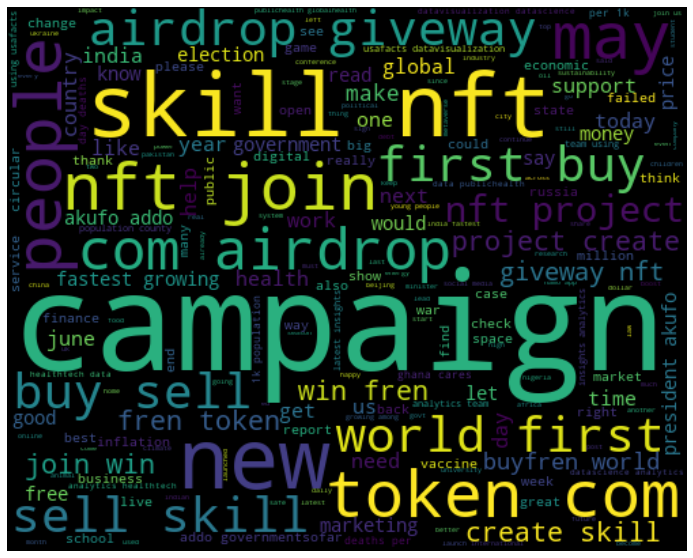

In [67]:
# Plot a word cloud

all_words = ' '.join( [data for data in df['tweet_text']])
word_cloud = WordCloud(width=500, height=400, random_state=21, max_font_size = 100,
                       stopwords=stopwords).generate(all_words)

plt.figure(figsize = (20,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Refining your Twitter API search query

In [68]:
search_words = "campaign OR foodprices OR lowerfoodprices OR covid19 OR economy"

# Latitude, logitude and search radius(km) for Zambia and some surrounding regions
loc = "1.2921,36.8219,1000km"

# Search dates
date_since = "2022-05-21"
date_until = "2022-05-26"

# We also want to exclude retweets and replies as this may sway results
my_search = search_words + " -filter:retweets" + " -filter:replies"  

In [69]:
# Use the tweepy Cursor method to access tweets from a specified region and between certain dates
tweets = tw.Cursor(api.search,
                       q=my_search,
                       lang="en",
                       tweet_mode='extended',
                       geocode=loc,
                       since=date_since,
                       until=date_until).items(1000)

In [70]:
# Once again, this should take ~2 minutes to run if you are collecting 1000 tweets
tweet_info = [[tweet.id_str,tweet.created_at,tweet.user.location,tweet.full_text] for tweet in tweets]

# Put our data into a dataframe 
df_new = pd.DataFrame(data=tweet_info, columns=['tweet_id_str','date_time','location','tweet_text'])

# Have a quick look at the dataframe
df_new

,tweet_id_str,date_time,location,tweet_text
0,1529612798241959943,2022-05-25 23:58:04,Kenya,Water melon for Ksh18.00 @ kg in Bura tana. Dm for more details \nOrder : https://t.co/XEGd1wZQ1u\nUse App : https://t.co/L7r2Sz4eHl\nAD: https://t.co/DdPensGWLk https://t.co/blgLOHO8kU
1,1529612784828305408,2022-05-25 23:58:01,n/a,"true democracy is practised in china, people have more choices, food to feed its people. a gov't that passes practical, common sense measures. people first, economy second. local elections that pu..."
2,1529611298098618368,2022-05-25 23:52:06,Ethiopia,The Amhara regional state government has engaged in ethnic cleansing campaign against the Wollo Oromos. @USEmbassyAddis @amnestyusa @hrw @StateDept @SFRCdems @CNN @BBCWorld @FRANCE24 @Reuters #Oro...
3,1529610794933305345,2022-05-25 23:50:06,Kenya,"pigs for Ksh6,000.00 @ piglet in Nakuru. high quality healthy breed.\nOrder : https://t.co/eac5rsAHq9\nUse App : https://t.co/L7r2Sz4eHl\nAD: https://t.co/DdPensGWLk https://t.co/fwYyzWIFCk"
4,1529609511404818433,2022-05-25 23:45:00,Ethiopia,‘Amhara security forces launched a campaign to destroy evidence of ethnic cleansing in Western Tigray’ @BBC reports. https://t.co/53WdR8ghCe @amnestyusa @hrw @StateDept @SFRCdems @CNN @BBCWorld @F...
...,...,...,...,...
995,1529321937398386693,2022-05-25 04:42:17,Kenya,Kenya Kwanza fringe parties protest UDA's six-piece voting campaign\nhttps://t.co/XuwDJcwqrr
996,1529321879781003264,2022-05-25 04:42:04,Kenya,onions for Ksh40.00 @ kg in Karatina. \nOrder : https://t.co/8hZHgAFIQQ\nUse App : https://t.co/L7r2SzlhJl https://t.co/bXofWGoE0M
997,1529320692038176768,2022-05-25 04:37:21,Kenya,Kenya needs an economy recovery plan. We need to get the best always.\n\n#EconomyFirst\nBottom Up https://t.co/MMNN7pNI5r
998,1529320434805645319,2022-05-25 04:36:19,"Eldoret, Kenya","A diligent, honest and transparent leader who will bring the much needed change in our economy.\n#WesternKKStrong"


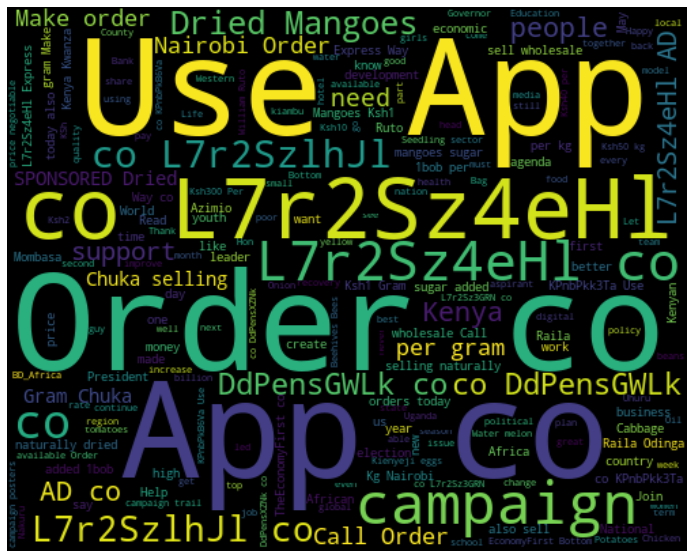

In [71]:
all_words = ' '.join( [data for data in df_new['tweet_text']])
word_cloud = WordCloud(width=500, height=400, random_state=21, max_font_size = 100,
                       stopwords=stopwords).generate(all_words)

plt.figure(figsize = (20,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [72]:
from google.colab import files
df_new .to_csv('df.csv')
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>